### 1. Get the data ready

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [24]:
hd = pd.read_csv("heart-disease.csv")
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
# Create X (all the feature columns)
X = hd.drop("target", axis=1)

# Create y (the target column - label)
y = hd["target"]

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [26]:
y.head(), y.value_counts()

(0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64,
 target
 1    165
 0    138
 Name: count, dtype: int64)

In [45]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

# by default train_test_split uses 25% of the data for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

### 2. Choose the model and hyperparameters

In [46]:
# classification problem - RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [47]:
# View the current hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 3. Fit the model to the data and use it to make a prediction

In [48]:
clf.fit(X=X_train, y=y_train)

RandomForestClassifier()

In [49]:
# Use the model to make a prediction
y_preds = clf.predict(X=X_test)

### 4. Evaluate the model

In [50]:
# Evaluate the model on the training set
train_acc = clf.score(X=X_train, y=y_train)
print(f"The model's accuracy on the training dataset is: {train_acc*100:.2f}%")

The model's accuracy on the training dataset is: 100.00%


In [51]:
# Evaluate the model on the test set
test_acc = clf.score(X=X_test, y=y_test)
print(f"The model's accuracy on the testing dataset is: {test_acc*100:.2f}%")

The model's accuracy on the testing dataset is: 81.58%


In [52]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create a classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        40
           1       0.79      0.83      0.81        36

    accuracy                           0.82        76
   macro avg       0.82      0.82      0.82        76
weighted avg       0.82      0.82      0.82        76



In [53]:
# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[32,  8],
       [ 6, 30]])

In [54]:
# Compute the accuracy score (same as the score() method for classifiers) 
accuracy_score(y_test, y_preds)

0.8157894736842105

In [61]:
# Try different numbers of estimators (trees)... (no cross-validation)
np.random.seed(42)
for i in range(100, 200, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {model.score(X_test, y_test) * 100:.2f}%")
    

Trying model with 100 estimators...
Model accuracy on test set: 86.84%
Trying model with 110 estimators...
Model accuracy on test set: 84.21%
Trying model with 120 estimators...
Model accuracy on test set: 81.58%
Trying model with 130 estimators...
Model accuracy on test set: 84.21%
Trying model with 140 estimators...
Model accuracy on test set: 82.89%
Trying model with 150 estimators...
Model accuracy on test set: 81.58%
Trying model with 160 estimators...
Model accuracy on test set: 82.89%
Trying model with 170 estimators...
Model accuracy on test set: 84.21%
Trying model with 180 estimators...
Model accuracy on test set: 82.89%
Trying model with 190 estimators...
Model accuracy on test set: 84.21%


In [62]:
# With cross validation
from sklearn.model_selection import cross_val_score

np.random.seed(42)
for i in range(100, 200, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)

    # Measure the model score on a single train/test split
    model_score = model.score(X_test, y_test)
    print(f"Model accuracy on single test set split: {model_score * 100:.2f}%")

    # Measure the mean cross-validation score across 5 different train and test splits
    cross_val_mean = np.mean(cross_val_score(model, X, y, cv=5))
    print(f"5-fold cross-validation score: {cross_val_mean * 100:.2f}%")

Trying model with 100 estimators...
Model accuracy on single test set split: 86.84%
5-fold cross-validation score: 82.15%
Trying model with 110 estimators...
Model accuracy on single test set split: 84.21%
5-fold cross-validation score: 81.17%
Trying model with 120 estimators...
Model accuracy on single test set split: 84.21%
5-fold cross-validation score: 83.16%
Trying model with 130 estimators...
Model accuracy on single test set split: 81.58%
5-fold cross-validation score: 83.14%
Trying model with 140 estimators...
Model accuracy on single test set split: 82.89%
5-fold cross-validation score: 82.48%
Trying model with 150 estimators...
Model accuracy on single test set split: 82.89%
5-fold cross-validation score: 80.17%
Trying model with 160 estimators...
Model accuracy on single test set split: 85.53%
5-fold cross-validation score: 80.83%
Trying model with 170 estimators...
Model accuracy on single test set split: 82.89%
5-fold cross-validation score: 81.83%
Trying model with 180 es

In [73]:
# Another way to do it with GridSearchCV...
np.random.seed(42)
from sklearn.model_selection import GridSearchCV

# Define the parameters to search over in dictionary form 
# (these can be any of your target model's hyperparameters)
param_grid = {"n_estimators": [i for i in range(100, 200, 10)]}

# Setup the grid search
grid = GridSearchCV(estimator=RandomForestClassifier(),
                   param_grid=param_grid,
                   cv=5,
                   verbose=1)

# Fit the grid search to the data
grid.fit(X, y)

# Find the best parameters
print(f"The best parameter values are: {grid.best_params_}")
print(f"With a score of: {grid.best_score_*100:.2f}%")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameter values are: {'n_estimators': 120}
With a score of: 82.82%


In [74]:
# Set the model to be the best estimator
clf= grid.best_estimator_
clf

RandomForestClassifier(n_estimators=120)

In [75]:
# Fit the best model
clf = clf.fit(X_train, y_train)

# Find the best model scores on our single test split
# (note: this may be lower than the cross-validation score since it's only on one split of the data)
print(f"Best model score on single split of the data: {clf.score(X_test, y_test)*100:.2f}%")

Best model score on single split of the data: 86.84%


### 6. Save a model for someone else to use

In [76]:
import pickle

# Save an existing model to file
pickle.dump(model, open("random_forest_model_1.pkl", "wb"))

In [77]:
# Load a saved pickle model and evaluate it
loaded_pickle_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
print(f"Loaded pickle model prediction score {loaded_pickle_model.score(X_test, y_test) * 100:.2f}%")

Loaded pickle model prediction score 82.89%


In [78]:
# For larger models, it may be more efficient to use Joblib.
from joblib import dump, load

# Save a model using joblib
dump(model, "random_forest_model_1.joblib")

['random_forest_model_1.joblib']

In [79]:
# Load a saved joblib model and evaluate it
loaded_joblib_model = load("random_forest_model_1.joblib")
print(f"Loaded joblib model prediction score: {loaded_joblib_model.score(X_test, y_test) * 100:.2f}%")

Loaded joblib model prediction score: 82.89%


## Workflow steps

### 1. Getting the data ready

#### Converting non-numerical values to numerical values (also call feature encoding)

1. Import [`sklearn.preprocessing.OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) to one-hot encode our features and [`sklearn.compose.ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) to target the specific columns of our DataFrame to transform.
2. Define the categorical features we'd like to transform.
3. Create an instance of the `OneHotEncoder`.
4. Create an instance of `ColumnTransformer` and feed it the transforms we'd like to make.
5. Fit the instance of the `ColumnTransformer` to our data and transform it with the [`fit_transform(X)`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer.fit_transform) method.

In [81]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [82]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [87]:
# split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [89]:
# turn the categories into numbers
car_sales["Doors"].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [90]:
# 1. Import OneHotEncoder and ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# 2. Define the categorical features to transform
categorical_features = ["Make", "Colour", "Doors"]

# 3. Create an instance of OneHotEncoder
one_hot = OneHotEncoder()

# 4. Create an instance of ColumnTransformer
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], #name, transformer, column_to_transform
                                remainder="passthrough") # what to do with the rest of the columns? ("passthrough" = leave unchanged)

# 5. Turn the categorical features into numbers (this will return an array-like sparse matrix, not a DataFrame)
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]], shape=(1000, 13))

In [92]:
pd.DataFrame(transformed_X)[:10]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,42652.0
6,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,163453.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,43120.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,130538.0
9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,51029.0


In [95]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies[:10]

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
5,4,False,True,False,False,False,False,False,True,False
6,4,False,False,False,True,False,True,False,False,False
7,4,False,True,False,False,False,False,False,False,True
8,4,False,False,True,False,False,False,False,False,True
9,4,False,True,False,False,False,True,False,False,False


In [96]:
# build machine learning model
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [97]:
model.score(X_test, y_test)

0.3235867221569877

#### Missing values

In [101]:
# Import car sales dataframe with missing values
car_sm = pd.read_csv("car-sales-extended-missing-data.csv")
car_sm.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [102]:
car_sm.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

#### Models which can handle NaNs or missing values directly.
https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

#### Option 1: Fill missing data with Pandas

In [103]:
car_sm["Make"] = car_sm["Make"].fillna(value="missing")
car_sm["Colour"] = car_sm["Colour"].fillna(value="missing")
car_sm["Doors"] = car_sm["Doors"].fillna(value=4)
car_sm["Odometer (KM)"] = car_sm["Odometer (KM)"].fillna(car_sm["Odometer (KM)"].mean())
car_sm.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [105]:
# Remove rows with missing Price labels
car_sm.dropna(inplace=True)
car_sm.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [106]:
len(car_sm)

950

In [107]:
X_miss = car_sm.drop("Price", axis=1)
y_miss = car_sm["Price"]

In [108]:
X_miss.shape, y_miss.shape

((950, 4), (950,))

In [109]:
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], 
                                remainder="passthrough")

transformed_X_miss = transformer.fit_transform(X_miss)
transformed_X_miss

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

In [110]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X_miss, y_miss, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22011714008302485

Once your data is all in numerical format, there's one more transformation you'll probably want to do to it.

It's called Feature Scaling.

In other words, making sure all of your numerical data is on the same scale.

For example, say you were trying to predict the sale price of cars and the number of kilometres on their odometers varies from 6,000 to 345,000 but the median previous repair cost varies from 100 to 1,700. A machine learning algorithm may have trouble finding patterns in these wide-ranging variables.

To fix this, there are two main types of feature scaling.

Normalization (also called min-max scaling) - This rescales all the numerical values to between 0 and 1, with the lowest value being close to 0 and the highest previous value being close to 1. Scikit-Learn provides functionality for this in the MinMaxScalar class.
Standardization - This subtracts the mean value from all of the features (so the resulting features have 0 mean). It then scales the features to unit variance (by dividing the feature by the standard deviation). Scikit-Learn provides functionality for this in the StandardScalar class.
A couple of things to note.

Feature scaling usually isn't required for your target variable.
Feature scaling is usually not required with tree-based models (e.g. Random Forest) since they can handle varying features.
Extra reading

For further information on this topic, I'd suggest the following resources.

Feature Scaling - why is it required? by Rahul Saini (https://rahul-saini.medium.com/feature-scaling-why-it-is-required-8a93df1af310)
Feature Scaling with Scikit-Learn by Ben Alex Keen (https://benalexkeen.com/feature-scaling-with-scikit-learn/)
Feature Scaling for Machine Learning: Understanding the Difference Between Normalization vs. Standardization by Aniruddha Bhandari
(https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)

#### Option 2: Fill missing data with SciKit-Learn

In [140]:
car_sm = pd.read_csv("car-sales-extended-missing-data.csv")
car_sm.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [141]:
# Drop the rows with missing in the Price column
car_sm.dropna(subset=["Price"], inplace=True)
car_sm.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [142]:
X = car_sm.drop("Price", axis=1)
y = car_sm["Price"]

In [143]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [144]:
from sklearn.impute import SimpleImputer

cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define different column features
categorical_features = ["Make", "Colour"]
door_feature = ["Doors"]
numerical_feature = ["Odometer (KM)"]

In [145]:
from sklearn.compose import ColumnTransformer

# Create series of column transforms to perform
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, categorical_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, numerical_feature)
])

In [146]:
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.fit_transform(X_test)

In [147]:
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], shape=(760, 4), dtype=object)

In [148]:
# turn filled_X_train and filled_X_test arrays into DataFrames 
filled_X_train_df = pd.DataFrame(filled_X_train,
                                 columns=["Make", "Colour", "Doors", "Odometer (KM)"])
filled_X_test_df = pd.DataFrame(filled_X_test,
                                columns=["Make", "Colour", "Doors", "Odometer (KM)"])
filled_X_train_df.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [152]:
filled_X_train_df.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,71934.0
1,Toyota,Red,4.0,162665.0
2,Honda,White,4.0,42844.0
3,Honda,White,4.0,195829.0
4,Honda,Blue,4.0,219217.0


In [154]:
# Transform to numerical format (encode the features)

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features =  ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                                remainder="passthrough",
                                sparse_threshold=0) # return a sparse matrix or not

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(filled_X_train_df)
transformed_X_test = transformer.fit_transform(filled_X_test_df)

transformed_X_train

array([[0.0, 1.0, 0.0, ..., 1.0, 0.0, 71934.0],
       [0.0, 0.0, 0.0, ..., 1.0, 0.0, 162665.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 42844.0],
       ...,
       [0.0, 0.0, 0.0, ..., 1.0, 0.0, 196225.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 133117.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 150582.0]],
      shape=(760, 15), dtype=object)

In [155]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.25366332156443805

In [157]:
# Make predictions
y_preds = model.predict(transformed_X_test)
y_preds[:10]

array([17594.47      , 22879.43      , 11788.97      ,  9560.33      ,
       11211.87      , 11249.24      , 15691.54      , 10630.69      ,
       18072.94      , 12856.68666667])

In [160]:
np.array(y_test[:10])

array([10547., 17940., 12950.,  5905.,  9826., 11162., 13650., 14345.,
       12024., 10076.])

In [161]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

5656.811900501253

### Choosing the right estimator

https://scikit-learn.org/stable/machine_learning_map.html

#### Picking a machine learning model for a regression problem
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

In [122]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [126]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["MedHouseVal"] = pd.Series(housing["target"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [127]:
len(housing_df)

20640

In [128]:
# MedInc - median income in block group
# HouseAge - median house age in block group
# AveRooms - average number of rooms per household
# AveBedrms - average number of bedrooms per household

# The Problem: predict the target column (MedHouseVal) which expresses the median house value for 
# specific California districts in hundreds of thousands of dollars (e.g. 4.526 = $452,600).

# 20000 < samples < 100000
# regression
# algorithm: RidgeRegression

from sklearn.linear_model import Ridge

np.random.seed(42)

X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Ridge()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5758549611440131

In [130]:
# Let's try a different model - ensamble model - RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.806652667101436

In [133]:
np.random.seed(42)
for i in range(100, 200, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestRegressor(n_estimators=i).fit(X_train, y_train)
    
    model_score = model.score(X_test, y_test)
    print(f"Model accuracy on single test set split: {model_score * 100:.2f}%")

    #cross_val_mean = np.mean(cross_val_score(model, X, y, cv=10))
    #print(f"10-fold cross-validation score: {cross_val_mean * 100:.2f}%")

Trying model with 100 estimators...
Model accuracy on single test set split: 80.51%
Trying model with 110 estimators...
Model accuracy on single test set split: 80.55%
Trying model with 120 estimators...
Model accuracy on single test set split: 80.58%
Trying model with 130 estimators...
Model accuracy on single test set split: 80.70%
Trying model with 140 estimators...
Model accuracy on single test set split: 80.78%
Trying model with 150 estimators...
Model accuracy on single test set split: 80.78%
Trying model with 160 estimators...
Model accuracy on single test set split: 80.65%
Trying model with 170 estimators...
Model accuracy on single test set split: 80.59%
Trying model with 180 estimators...
Model accuracy on single test set split: 80.74%
Trying model with 190 estimators...
Model accuracy on single test set split: 80.73%


In [135]:
y_preds = model.predict(X_test)
y_preds[:10]

array([0.50010526, 0.75302632, 4.84062268, 2.56860526, 2.32501579,
       1.66727368, 2.36766326, 1.68320526, 2.62938468, 4.92973526])

In [136]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [137]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3264163300948595


## Evaluating a model

Scikit-Learn implements 3 different methods of evaluating models.

* The `score()` method. Calling `score()` on a model instance will return a metric assosciated with the type of model you're using. The metric depends on which model you're using.
* The `scoring` parameter. This parameter can be passed to methods such as `cross_val_score()` or `GridSearchCV()` to tell Scikit-Learn to use a specific type of scoring metric.
* Problem-specific metric functions available in sklearn.metrics. Similar to how the scoring parameter can be passed different scoring functions, Scikit-Learn implements these as stand alone functions.

In [166]:
hd = pd.read_csv("heart-disease.csv")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = hd.drop("target", axis=1)
y = hd["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8524590163934426

In [168]:
# Using cross_val_score()
cross_val_score(clf, X, y, cv=5) # cv = number of splits to test (5 by default)

array([0.83606557, 0.90163934, 0.78688525, 0.83333333, 0.73333333])

In [169]:
# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take mean of 5-fold cross-validation
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5, scoring=None)) # None - default scoring value

# When scoring is set to None (by default), it uses the same metric as score() for whatever model is passed to cross_val_score().
# In this case (clf = RandomForestClassifier), the model uses mean accuracy as the default score() metric

clf_single_score, clf_cross_val_score

(0.8524590163934426, np.float64(0.8248087431693989))


#### Classification model evaluation metrics

Four of the main evaluation metrics/methods you'll come across for classification models are:

1. [Accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy)
2. [Area under ROC curve](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc) (receiver operating characteristic curve)
3. [Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)
4. [Classification report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [170]:
# Accuracy as percentage
print(f"Heart Disease Classifier Accuracy: {clf.score(X_test, y_test) * 100:.2f}%")

Heart Disease Classifier Accuracy: 85.25%



#####
##### Area Under Receiver Operating Characteristic (ROC) Curve

It's usually referred to as AUC for Area Under Curve and the curve they're talking about is the Receiver Operating Characteristic or ROC for short.

ROC curves are a comparison of `true postive rate` (tpr) versus `false positive rate` (fpr).

For clarity:

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [175]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.875     , 0.125     ],
       [0.45      , 0.55      ],
       [0.43333333, 0.56666667],
       [0.84166667, 0.15833333],
       [0.19166667, 0.80833333],
       [0.14166667, 0.85833333],
       [0.35833333, 0.64166667],
       [0.95833333, 0.04166667],
       [0.99166667, 0.00833333],
       [0.425     , 0.575     ]])

In [176]:
# Keep the probabilites of the positive class only
y_probs = y_probs[:,1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.13793103,
       0.13793103, 0.17241379, 0.17241379, 0.20689655, 0.31034483,
       0.4137931 , 0.44827586, 0.51724138, 0.5862069 , 0.65517241,
       0.72413793, 0.72413793, 0.75862069, 0.89655172, 1.        ])

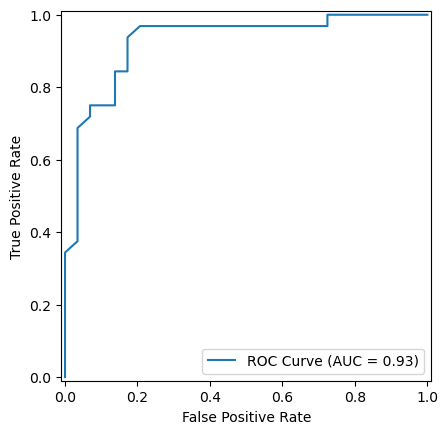

In [180]:
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                          estimator_name='ROC Curve')
display.plot()
plt.show()

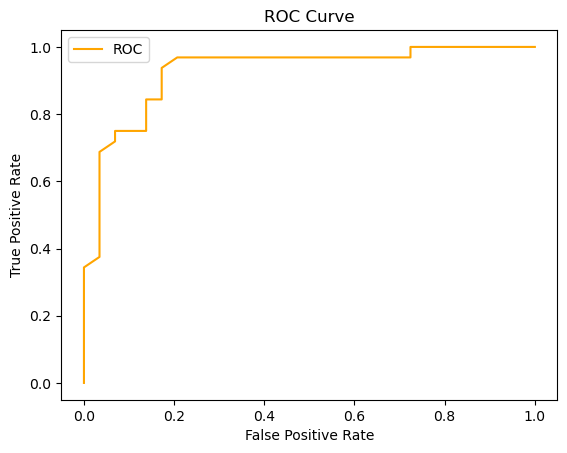

In [183]:
#
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """ 

    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    #plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [184]:
from sklearn.metrics import roc_auc_score

roc_auc_score_value = roc_auc_score(y_test, y_probs)
roc_auc_score_value

np.float64(0.9272629310344827)

* [ROC and AUC, Clearly Explained!](https://www.youtube.com/watch?v=4jRBRDbJemM) by StatQuest
* [ROC documentation in Scikit-Learn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html) (contains code examples)
* [How the ROC curve and AUC are calculated by Google's](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=pl) Machine Learning team

#### Confusion Matrix

In [186]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]])

In [188]:
pd.crosstab(y_test, y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


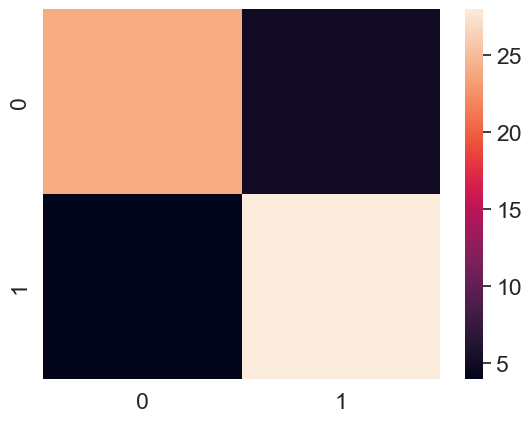

In [189]:
import seaborn as sns

sns.set(font_scale=1.5)
conf_mat = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_mat);

In [190]:
# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

In [192]:
import sklearn
sklearn.__version__

'1.6.1'

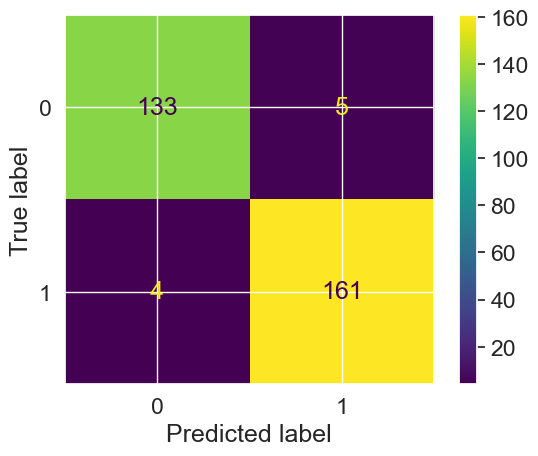

In [193]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X, y)

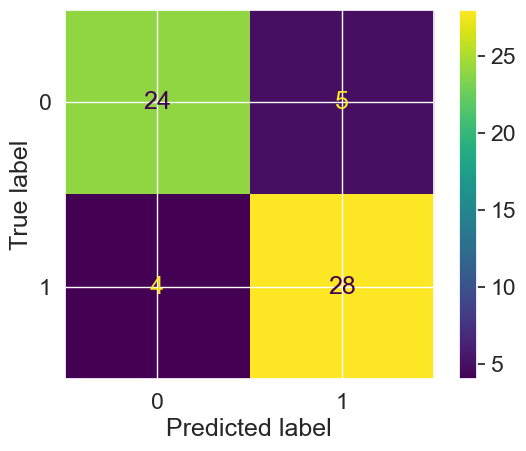

In [194]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

#### Classification Report

In [196]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



###
### Regression model evaluation metrics

* **R^2 (pronounced r-squared) or coefficient of determination** - Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1. Higher is better.
* **Mean absolute error (MAE)** - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were. Lower is better.
* **Mean squared error (MSE)** - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors). Lower is better.

In [198]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Split data into features (X) and labels (y)
X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train);

In [199]:
# coefficient of determination
model.score(X_test, y_test)  

0.806652667101436

##### MAE - Mean Absolute Error



In [200]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32656738464147306

**MAE = 0.327 - This means, on average our models predictions are 0.327 units away from the actual value.**

In [202]:
df = pd.DataFrame(data={"actual_values":y_test,
                        "predicted_values":y_preds})
df["difference"] = df["predicted_values"] - df["actual_values"]
df.head(10)

,actual_values,predicted_values,difference
20046,0.47700,0.493900,0.016900
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540240,0.354240
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.660220,0.073220
7113,1.98200,2.343100,0.361100
7668,1.57500,1.663110,0.088110
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [203]:
np.abs(df["difference"]).mean()

np.float64(0.32656738464147306)

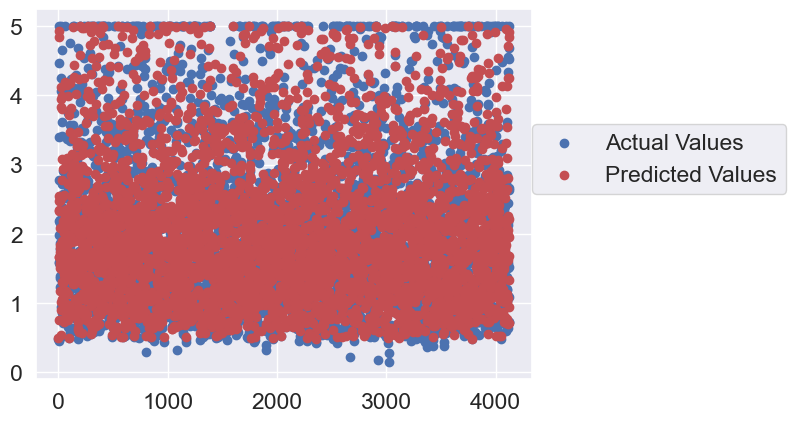

In [210]:
fig, ax = plt.subplots()
x = np.arange(0, len(df),1)
ax.scatter(x, df["actual_values"], c='b', label="Actual Values")
ax.scatter(x, df["predicted_values"], c='r', label="Predicted Values")
ax.legend(loc=(1, 0.5))
plt.show()

##### MSE - Mean squared error

In [205]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.25336408094921037

In [206]:
df["sq_difference"] = np.square(df["difference"])
df.head()

,actual_values,predicted_values,difference,sq_difference
20046,0.47700,0.493900,0.016900,0.000286
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540240,0.354240,0.125486
9814,2.78000,2.331760,-0.448240,0.200919


In [209]:
squared = np.square(df["difference"])
squared.mean()

np.float64(0.25336408094921037)

### Example

In [211]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [212]:
len(X)

20640

In [217]:
X = data["data"]
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [218]:
data_df = pd.DataFrame(X,
                       columns=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'])
data_df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [220]:
data_df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [222]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_probs = model.predict_proba(X_test)[:, 1]
y_probs[:10]

array([8.78866438e-01, 2.92218247e-08, 1.57695292e-03, 9.98771648e-01,
       9.99859481e-01, 1.94300386e-10, 5.81541344e-11, 1.91027859e-02,
       9.84677704e-01, 9.94330647e-01])

In [223]:
auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC: {auc:.2f}")

ROC AUC: 1.00


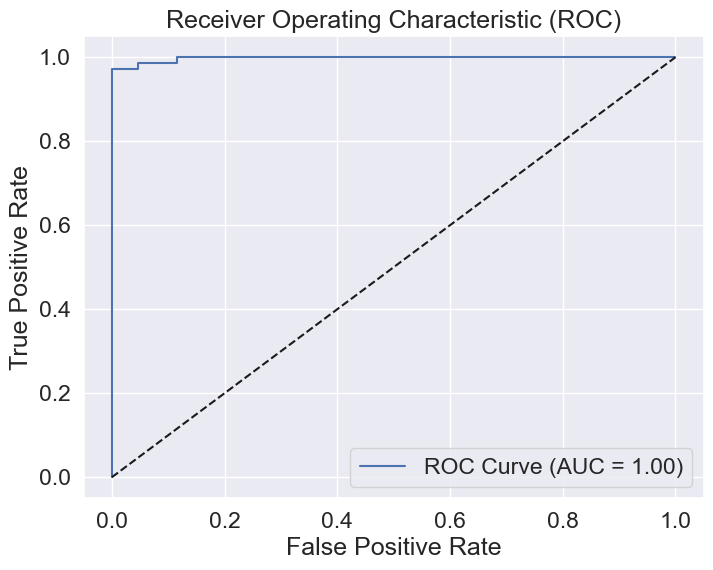

In [224]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # linia losowa
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Improving a model

The ways of adjusting hyperparameters:

1. By hand
2. Randomly with [`sklearn.model_selection.RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
3. Exhaustively with [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [228]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [232]:
# by hand
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [237]:
def show_evaluation(y_true: np.array,
                   y_preds: np.array) -> None:
    
    metric_dict = evaluate_preds(y_true, y_preds);
    print(f"Accuuracy: {metric_dict["accuracy"] * 100:.2f}%")
    print(f"Precision: {metric_dict["precision"] :.2f}")
    print(f"Recall: {metric_dict["recall"]:.2f}")
    print(f"F1 score: {metric_dict["f1"]:.2f}")


def evaluate_preds(y_true: np.array,
                   y_preds: np.array) -> dict:
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    Returns several metrics in the form of a dictionary.
    """

    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)

    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    return metric_dict

In [281]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
hd = pd.read_csv("heart-disease.csv")

X = hd.drop("target", axis=1)
y = hd["target"]

# Training and test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create validation and test split by spliting testing data in half (30% test -> 15% validation, 15% test)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

{'accuracy': 0.8, 'precision': 0.78, 'recall': 0.88, 'f1': 0.82}

In [282]:
len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

In [283]:
# by hand
np.random.seed(42)

# Create a second classifier
clf_2 = RandomForestClassifier(n_estimators=150)
clf_2.fit(X_train, y_train)

y_preds = clf_2.predict(X_valid)
clf_2_metrics = evaluate_preds(y_valid, y_preds)
clf_2_metrics

{'accuracy': 0.8, 'precision': 0.8, 'recall': 0.83, 'f1': 0.82}

##### tuning with RandomizedSearchCV

We're going to adjust:
* n_estimators
* max_depth
* max_features
* min_samples_split
* min_samples_leaf

In [295]:
param_distributions = {"n_estimators": [100, 150, 300, 600, 1000],
                       "max_depth": [None, 5, 10, 20, 30],
                       "max_features": ["sqrt", "log2", None],
                       "min_samples_split": [2, 4, 6, 8],
                       "min_samples_leaf": [1, 2, 3, 5]}

# Count the total number of hyperparameter combinations to test
combinations = np.prod([len(value) for value in param_distributions.values()])
combinations

np.int64(1200)

In [296]:
import time
start_time = time.time()

from sklearn.model_selection import RandomizedSearchCV

X = hd.drop("target", axis=1)
y = hd["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set n_jobs to -1 to use all available cores on your machine
clf = RandomForestClassifier(n_jobs=-1)

# Setup RandomizedSearchCV 
n_iter = 30 # try 30 models total

rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions = param_distributions,
                            n_iter = n_iter,
                            cv = 5,  # 5-fold cross-validation
                            verbose=2) # print out results

rs_clf.fit(X_train, y_train)

end_time = time.time()
print(f"[INFO] Total time taken for {n_iter} random combinations of hyperparameters: {end_time - start_time:.2f} seconds.")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=8, n_estimators=150; 

In [297]:
# Find the best hyperparameters found by RandomizedSearchCV
rs_clf.best_params_

{'n_estimators': 300,
 'min_samples_split': 4,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 30}

In [298]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)
rs_metrics = evaluate_preds(y_test, rs_y_preds)
rs_metrics

{'accuracy': 0.84, 'precision': 0.79, 'recall': 0.94, 'f1': 0.86}

##### tuning with GridSearchCV

The workflow:
* Tune hyperparameters by hand to get a feel of the data/model.
* Create a large set of hyperparameter distributions and search across them randomly with RandomizedSearchCV.
* Find the best hyperparameters from 2 and reduce the search space before searching across a smaller subset exhaustively with GridSearchCV.

In [299]:
rs_clf.best_params_

{'n_estimators': 300,
 'min_samples_split': 4,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 30}

In [300]:
# Create hyperparameter grid similar to rs_clf.best_params_
param_grid = {"n_estimators": [100, 120, 150],
              "max_depth": [None],
              "max_features": ["sqrt"],
              "min_samples_split": [2, 3],
              "min_samples_leaf": [1, 2, 3]}

In [301]:
combinations = np.prod([len(value) for value in param_grid.values()])
combinations

np.int64(18)

In [302]:
import time
start_time = time.time()

from sklearn.model_selection import GridSearchCV

X = hd.drop("target", axis=1)
y = hd["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set n_jobs to -1 to use all available cores on your machine
clf = RandomForestClassifier(n_jobs=-1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid= param_grid,
                      cv=5,
                      verbose=2)

gs_clf.fit(X_train, y_train)
end_time = time.time()
print(f"[INFO] Total time taken: {end_time - start_time:.2f} seconds.")       

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, 

In [303]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 150}

In [304]:
# Max predictions with the GridSearchCV classifier
gs_y_preds = gs_clf.predict(X_test)

In [305]:
gs_metrics = evaluate_preds(y_test, gs_y_preds)
gs_metrics

{'accuracy': 0.87, 'precision': 0.89, 'recall': 0.89, 'f1': 0.89}

<Axes: >

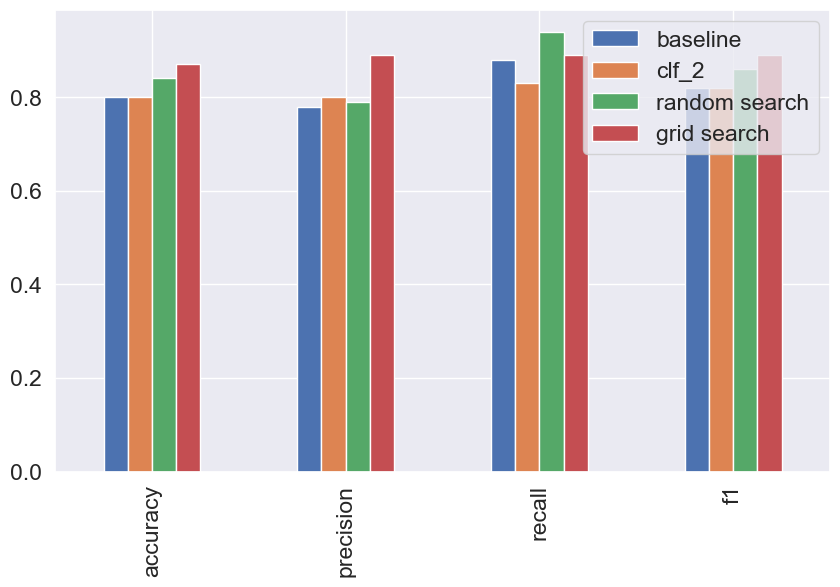

In [306]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10,6))

##### Saving and loading a model

In [308]:
# pickle

import pickle
with open("gs_random_forest_model_1.pkl", "wb") as f:
    pickle.dump(gs_clf, f)

In [309]:
with open("gs_random_forest_model_1.pkl", "rb") as f:
    loaded_pickle_model = pickle.load(f)

In [310]:
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

{'accuracy': 0.87, 'precision': 0.89, 'recall': 0.89, 'f1': 0.89}

In [311]:
# joblib

from joblib import dump, load
dump(gs_clf, filename="gs_random_forest_model_1.joblib") 

['gs_random_forest_model_1.joblib']

In [313]:
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [314]:
joblib_y_preds = loaded_joblib_model.predict(X_test)
loaded_joblib_model_metrics = evaluate_preds(y_test, joblib_y_preds)
loaded_joblib_model_metrics

{'accuracy': 0.87, 'precision': 0.89, 'recall': 0.89, 'f1': 0.89}

## Putting it all together with `Pipeline`

In [315]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [320]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [321]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

# -------------
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [324]:
# Getting data ready
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop the rows with missing labels
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipelines
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

doors_feature = ["Doors"]
doors_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", doors_transformer, doors_feature),
        ("num", numeric_transformer, numeric_features),
    ]
)

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_jobs=-1))
])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

In [325]:
# Using grid search with pipeline
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 500, 1000],
    "model__max_depth": [None, 5], 
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samp

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model',
                                        RandomForestRegressor(n_jobs=-1))]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 500, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [326]:
# Score the best model
gs_model.score(X_test, y_test)

0.29141930430644347